## Deep Learning Regularization

😓Be well prepared that when the code worked for me, may not work for you any more. It took me so much time tonight to debug, upgrade/install packages, change deprecated functions or just ignore warnings.... All because the frequent changes in these open source packages. So, when it's your turn to try the code, who know whether it still works...

💝However, when you are seeing my code, you are lucky! At least I took the note on those things need to care about, including the solutions.

In [11]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from imageio import imread
from sklearn.metrics import accuracy_score
import pylab

import tensorflow as tf
import keras

### NOTE

You may got an error saying cannot import module "weakref". This problem was not exist before but just appeared...
Here's my solution:
1. Find your tensorflow path by typing `pip show tensorflow`
2. Find tensorflow/python/util/tf_should_use.py, open it
3. Change `from backports import weakref` to `import weakref`
4. Then comment the line that contains `finalize()` function, this is for garbage collection, but finalize function does not exist in weakref in my case.... 😓
5. Restart your ipython

In [12]:
seed = 10
rng = np.random.RandomState(seed)

In [4]:
train = pd.read_csv('digit_recognition/train.csv')
test = pd.read_csv('digit_recognition/test.csv')

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


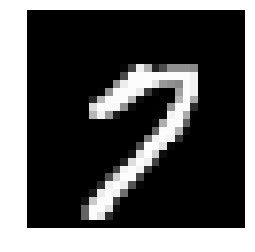

In [46]:
img_name = rng.choice(train.filename)
training_image_path = 'digit_recognition/Images/train/' + img_name

training_img = imread(training_image_path, as_gray=True)

pylab.imshow(training_img, cmap='gray')
pylab.axis('off')
pylab.show()

In [47]:
training_img[7:9]

Image([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   6.,  67., 239., 177.,  34.,  77., 143., 143., 143., 137.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  73., 252., 252., 253., 252., 252., 252., 252., 252., 241.,
          0.,   0.,   0.,   0.,   0.,   0.]], dtype=float32)

In [48]:
# store all images as numpy arrays, to make data manipulation easier

temp = []
for img_name in train.filename:
    training_image_path = 'digit_recognition/Images/train/' + img_name
    training_img = imread(training_image_path, as_gray=True)
    img = training_img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    testing_image_path = 'digit_recognition/Images/test/' + img_name
    testing_img = imread(testing_image_path, as_gray=True)
    img = testing_img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [49]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [51]:
# split into training and validation sets, 7:3

split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [53]:
train.label.iloc[split_size:split_size+2]

34300    3
34301    1
Name: label, dtype: int64

In [54]:
from keras.models import Sequential
from keras.layers import Dense

# define variables
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 5
batch_size = 100

### NOTE

Keras updated to 2.0
Without updating keras, the way you used `Dense()` function may keep giving warnings

* Here's Keras 2.0 documentation: https://keras.io/
* To update keras, type `sudo pip install --upgrade keras==2.1.3`. Has to be keras 2.1.3, if it's higher, softmax may get an error below.... (this is why I hate deep learning when you have to use open source!)
* Holy s**t, even after the updating, you will get many warnings again, just ignore them..

In [60]:
import warnings
warnings.filterwarnings('ignore')

# Method 1 - Without Regularization

model = Sequential()
model.add(Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'))
model.add(Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'))
model.add(Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'))
model.add(Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'))
model.add(Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'))
model.add(Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'))
model.add(Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y)) 

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 20s 578us/step - loss: 0.3041 - acc: 0.9056 - val_loss: 0.1740 - val_acc: 0.9493
Epoch 2/5
34300/34300 [==============================] - 19s 542us/step - loss: 0.1331 - acc: 0.9609 - val_loss: 0.1212 - val_acc: 0.9672
Epoch 3/5
34300/34300 [==============================] - 19s 540us/step - loss: 0.0870 - acc: 0.9742 - val_loss: 0.1300 - val_acc: 0.9655
Epoch 4/5
34300/34300 [==============================] - 16s 479us/step - loss: 0.0703 - acc: 0.9800 - val_loss: 0.1174 - val_acc: 0.9688
Epoch 5/5
34300/34300 [==============================] - 18s 512us/step - loss: 0.0540 - acc: 0.9842 - val_loss: 0.1301 - val_acc: 0.9697


Prediction is:  9


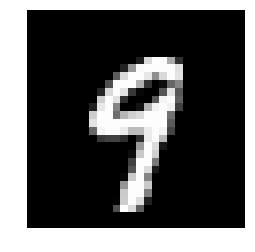

In [66]:
# model evaluation

pred = model.predict_classes(test_x)

img_name = rng.choice(test.filename)
testing_image_path = 'digit_recognition/Images/test/' + img_name
testing_img = imread(testing_image_path, as_gray=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print "Prediction is: ", pred[test_index]

pylab.imshow(testing_img, cmap='gray')
pylab.axis('off')
pylab.show()

In [ ]:
# Method 2 - With L2 regularizer